In [11]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [12]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '0'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0']

No handles with labels found to put in legend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['id=1000', 'id=1001'](n=2#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0


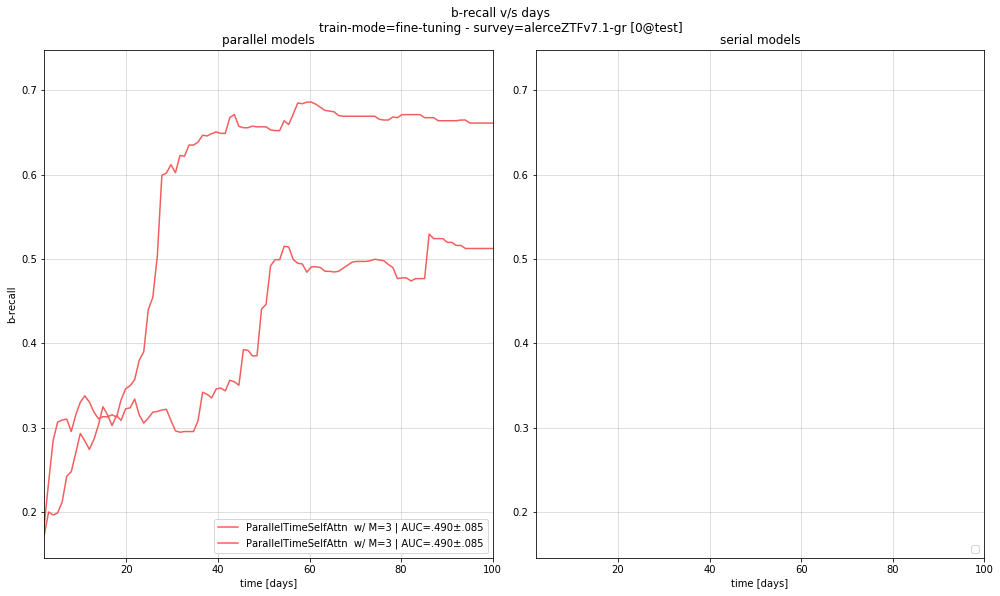

No handles with labels found to put in legend.


ids=['id=1000', 'id=1001'](n=2#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g32-g32-g32-g32.r32-r32-r32-r32~dec-emb=g32-g32-g32-g32.r32-r32-r32-r32~bypass=0


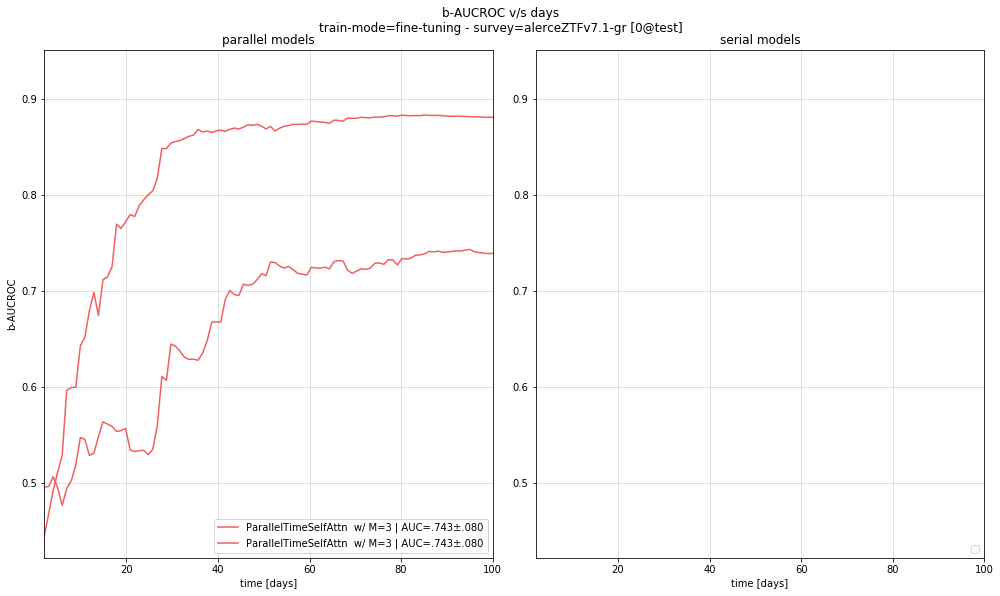

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.plots import plot_metric

dmetrics = {
    #f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    #f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    #'baselines_dict':baselines_dict,
    'p':None, # None 5 10 25
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_performance_df
from fuzzytools.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':False, # False True
    'day':100,
    #'override_model_name':False, # False True
    #'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_ps_performance_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)
for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

lcset_name = 'test'
kwargs = {
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

lcset_name = f'train.{method}'
kwargs = {
    }
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_times_df

kwargs = {
    }
info_df = get_ps_times_df(rootdir, cfilename, kf, method, model_names, **kwargs)
info_df()